# Benign vs. Malignant Cancer Prediction
<p style="font-size:18px"> An Analysis and Machine Learning Experiment with the Wisconsin Breast Cancer Database </p>
<img src="breast-cancer.png" alt="Cells" width="1000" height="150">

It cannot be stressed enough that early diagnosis of cancer is important for improving the chances of cure and the overall quality of life of the diagnosed. With much focus on research in finding cure, diagnosis is another area which interdisciplinary scientists can utilize machine learning. 

This document presents a brief analysis of the popular UCI-ML database, Wisconsin Breast Cancer data and the application of KNearest Neighbors classification for predicting the status of the cancer samples.

## About the Data

The features included in the modified dataset were derived from the original Breast Cancer Wisconsin (Diagnostic) Data Set downloaded from <https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)>. The data provided were computed from digitized image of a fine needle aspirate (FNA) of a breast mass. They are descriptive characteristics of the cell nuclei present in the image. The attributes and range of values each takes are outlined in the table below:

| | Attribute | Values |
|:---------|:----------|:----------|:-----:|
|1|Sample code number  |(removed)|
|2|Clump Thickness  |             1 - 10|
|3|Uniformity of Cell Size |      1 - 10|
|4|Uniformity of Cell Shape  |    1 - 10|
|5|Marginal Adhesion       |      1 - 10|
|6|Single Epithelial Cell Size |  1 - 10|
|7|Bare Nuclei      |             1 - 10|
|8|Bland Chromatin   |            1 - 10|
|9|Normal Nucleoli    |           1 - 10|
|10|Mitoses       |                1 - 10|
|11|Class        |                2: benign, 4: malignant|

## Questions we would like to ask

With the desire to recognize the state of cancer early on before it progresses, some questions we would like to ask the data are:
1. What features from the sample images indicates the cancer being benign or malignant?
2. Can we reliably predict a sample's condition of potential metastasis?
3. How accurate can we classify between benign or malignant cancer?

## Results of Analysis

### Initialization & Data Loading

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

df_breast_cancer = pd.read_excel('breast-cancer-wisconsin.xlsx', sheetname="all")

/anaconda3/lib/python3.6/site-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [11]:
df_breast_cancer.shape

(699, 10)

**Observation: ** The dataset contains 699 datapoints (rows) and 10 features (columns).

### Data Exploration

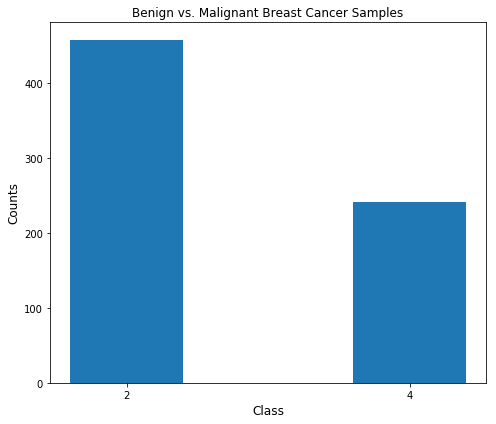

In [28]:
plt.figure(figsize=(7,6))
plt.bar(df_breast_cancer['Target'].value_counts().index, df_breast_cancer['Target'].value_counts());
plt.xticks([2,4]);
plt.xlabel("Class", size = 12)
plt.ylabel("Counts", size =12);
plt.title("Benign vs. Malignant Breast Cancer Samples", size =12)
plt.tight_layout()

**Observation:** The dataset contains more benign than malignant cancer samples.

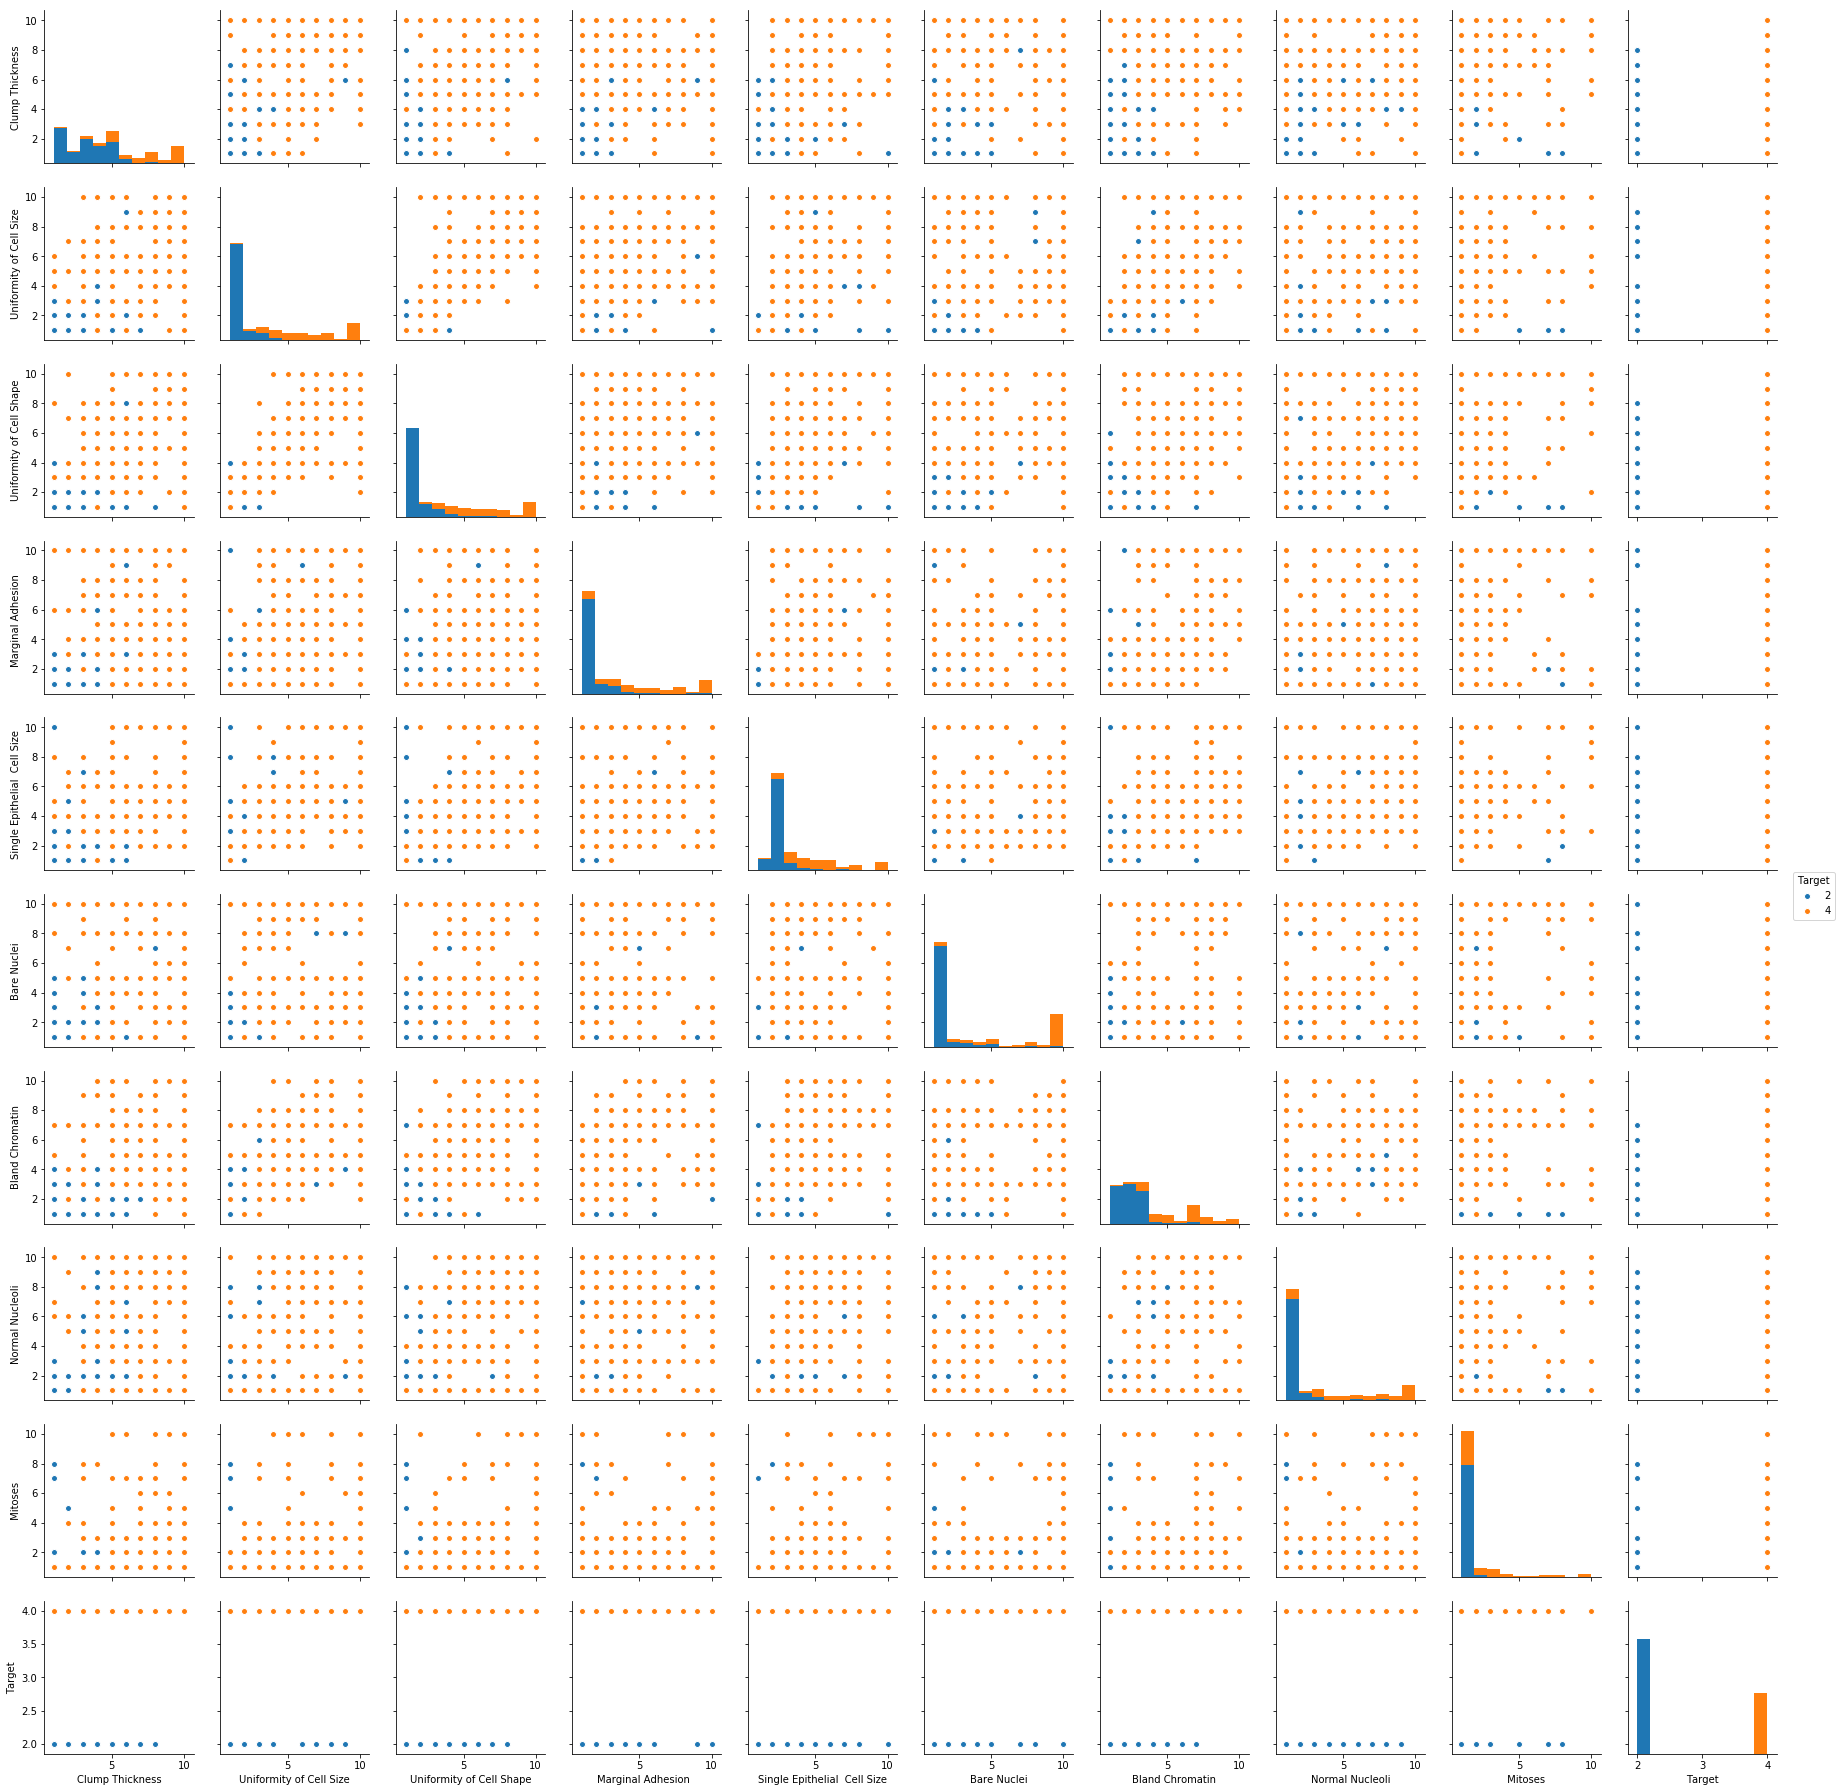

In [29]:
sns.pairplot(df_breast_cancer.iloc[:,:], hue='Target')

** Observation: ** Looking at the distribution of the `Targets` on each histogram in this scatter matrix, it could be observed that benign and malignant cancer samples can be identified with the given features except clearly on `Mitoses`.

In [10]:
state_counts = Counter(df_breast_cancer['Target'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')

num=(df_state[0]/df_state[0].sum())**2
print("Population per class: {}\n".format(df_state))
print("1.25 * Proportion Chance Criterion: {}%".format(1.25*100*num.sum()))

Population per class:      0
2  458
4  241

1.25 * Proportion Chance Criterion: 68.52344755741392%


** Observation:** To adequately evaluate the classifier, the proportion chance criterion was calculated. This value computes the accuracy of the system should the model relied on random chance given the distribution of the `Targets`. Given this, the succeeding classifier should have a testing accuracy greater than 1.5 times the proportion chance criterion (68.52%)

### KNearest Neighbors Classification

In [30]:
X = df_breast_cancer.iloc[:,:-1]
y = df_breast_cancer.iloc[:,-1]

In [31]:
def plot_n_neighbors_clf(feat, targ, title, nmax=10, step=2, max_rstate=5, test_size=0.25):
    training_accuracy = []
    test_accuracy = []
    training_std = []
    test_std = []
    neighbors_settings = range(1, nmax, step)
    random_states = range(1,max_rstate)
    
    n_neighbors_list = []
    
    for n_neighbors in neighbors_settings:
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)    
        train_acc_per_trial = []
        test_acc_per_trial = []
        for random_state in random_states:
            # split training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(feat,
                                                        targ, 
                                                        test_size=test_size,
                                                        random_state=random_state)
            # build the model
            clf.fit(X_train, y_train)
            # training set accuracy per trial
            train_acc_per_trial.append(clf.score(X_train, y_train))
            # testing set accuracy per trial
            test_acc_per_trial.append(clf.score(X_test, y_test))
        # record ave training accuracy    
        training_accuracy.append(np.mean(train_acc_per_trial))
        # record ave testing accuracy
        test_accuracy.append(np.mean(test_acc_per_trial))
        # record training std
        training_std.append(np.std(train_acc_per_trial))
        # record testing std
        test_std.append(np.std(test_acc_per_trial))
        
        n_neighbors_list.append(n_neighbors)

        
    results = pd.DataFrame([n_neighbors_list ,training_accuracy, test_accuracy, 
                            training_std, test_std]).T
    results.columns = ['n_neighbors', 'mean train score', 'mean test score', 
                       'train std', 'test std']

    # plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
    # plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
    plt.errorbar(neighbors_settings, training_accuracy, 
                 yerr=training_std, 
                 label="training accuracy" )
    plt.errorbar(neighbors_settings, test_accuracy, yerr=test_std, 
                 label="test accuracy" )
    plt.ylabel("Accuracy")
    plt.xlabel("n_neighbors")
    plt.title(title)
    plt.legend()    
    return results

,n_neighbors,mean train score,mean test score,train std,test std
0,1.0,1.000000,0.957864,0.000000,0.013286
1,3.0,0.980762,0.965714,0.004495,0.012504
2,5.0,0.978256,0.968254,0.004681,0.012323
3,7.0,0.975480,0.966522,0.003742,0.012635
4,9.0,0.972550,0.965310,0.004111,0.013789
5,11.0,0.970892,0.965137,0.004240,0.013651
6,13.0,0.969678,0.964098,0.004431,0.013951
7,15.0,0.968810,0.963405,0.004524,0.013709
8,17.0,0.968078,0.962655,0.004338,0.014559
9,19.0,0.966767,0.962078,0.004382,0.014172


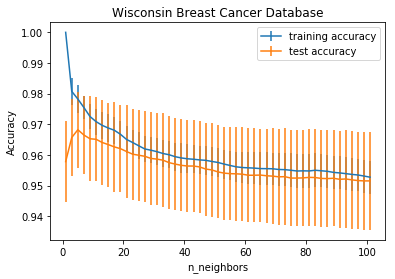

In [32]:
plot_n_neighbors_clf(X, y, 'Wisconsin Breast Cancer Database', nmax=102, step=2, max_rstate=100, test_size=0.25)

## Summary

Based on the given features, the system has a high degree of predictability with train and test accuracy not going lower than 95% for all 100 random state trials and for up to 70 number of neighbors. Although, it is apparent that there is a relatively high standard deviation *(see plot errorbars)* for the test accuracy but still floats around a well accepted score of greater than 94%. In addition to that, the resulting accuracy of the KNN classifier is greater than 1.25 times the proportional chance criterion--suggesting that the model is an appropriate choice for a classifier. Alternatively, except for the mitosis, all other features can be visually inspected to determine metastasis condition of samples. All in all, KNearest Neighbors classification can be a feasible algorithm for reliably classifying benign and malignant cancers. 

Interestingly, it is possible to automate the prediction by creating a physical system that visually recognizes the scans of cancer/tumor samples and feed the current model with the values of the features needed. 

## References

<sup>[1]</sup> Dua, D. and Karra Taniskidou, E. (2017). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

<sup>[2]</sup> O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.